In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [0]:
!apt-get update -qq 2>&1 > /dev/null
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.21-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.21-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.21-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [1]:
import os
os.chdir('drive/My Drive/CIFAR-10')
os.listdir()

['data_batch_1',
 'batches.meta',
 'data_batch_2',
 'data_batch_3',
 'data_batch_4',
 'data_batch_5',
 'test_batch',
 'readme.html',
 'test_images',
 'cifar_model(acc:91 val_acc:72).h5',
 'cifar_model(acc:86 val_acc:72).h5',
 'cifar_model(acc:86 val_acc:73).h5']

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [0]:
def unpickle(file):
  with open(file, 'rb') as f:
    dict = pickle.load(f, encoding = 'bytes')
  return dict

In [0]:
data_1 = unpickle('data_batch_1')
data_2 = unpickle('data_batch_2')
data_3 = unpickle('data_batch_3')
data_4 = unpickle('data_batch_4')
data_5 = unpickle('data_batch_5')

In [0]:
f = unpickle('batches.meta')
f

{b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_cases_per_batch': 10000,
 b'num_vis': 3072}

In [0]:
labels_1 = data_1[b'labels']
data_1 = data_1[b'data'] * 1.0
labels_2 = data_2[b'labels']
data_2 = data_2[b'data'] * 1.0
labels_3 = data_3[b'labels']
data_3 = data_3[b'data'] * 1.0
labels_4 = data_4[b'labels']
data_4 = data_4[b'data'] * 1.0
labels_5 = data_5[b'labels']
data_5 = data_5[b'data'] * 1.0

In [0]:
X_train = np.concatenate([data_1, data_2, data_3, data_4, data_5], axis = 0)
y_train = np.concatenate([labels_1, labels_2, labels_3, labels_4, labels_5], axis = 0)
X_train.shape, y_train.shape

((50000, 3072), (50000,))

In [0]:
def normalize(data):
  min_val = np.min(data)
  max_val = np.max(data)
  data = (data-min_val) / (max_val-min_val)
  return data

In [0]:
X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.astype('float32')
X_test /= 255

In [0]:
#X_train = normalize(X_train)
X_train = X_train.reshape(-1, 32, 32, 3)

In [0]:
X_train.shape

(40000, 32, 32, 3)

In [0]:
test_data = unpickle('test_batch')
X_test = test_data[b'data'] * 1.0
#X_test = normalize(X_test)
X_test = X_test.reshape(-1, 32, 32, 3)
y_test = np.asarray(test_data[b'labels'])

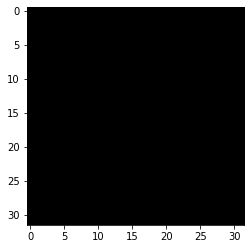

In [0]:

plt.imshow(X_train[50].astype(np.uint8))

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, BatchNormalization, Flatten, Dropout, Activation, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import adam, RMSprop
from keras import regularizers, optimizers
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import cifar10

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.astype('float32')
X_test /= 255

In [0]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes) 

In [82]:
X_val = X_train[:10000]
y_val = y_train[:10000]
X_train = X_train[10000:]
y_train = y_train[10000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((40000, 32, 32, 3), (40000, 10), (10000, 32, 32, 3), (10000, 10))

In [0]:
num_classes = 10
batch_size = 32
weight_decay = 1e-6

In [84]:
y_train.shape

(40000, 10)

In [0]:
def cifar():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2, 2))

  model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2, 2))

  model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2, 2))

  model.add(Flatten())
  model.add(Dense(256, activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))
  return model

In [0]:
callback = [ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor = 0.1, min_lr = 0.001)]

In [0]:
cifar_model = cifar()
optimizer = adam(learning_rate = 0.001)
cifar_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [88]:
history = cifar_model.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_data=(X_val,y_val), callbacks=callback)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 26s 646us/step - loss: 1.5788 - accuracy: 0.4625 - val_loss: 1.1068 - val_accuracy: 0.6123
Epoch 2/20
40000/40000 [==============================] - 25s 617us/step - loss: 0.9740 - accuracy: 0.6620 - val_loss: 0.9769 - val_accuracy: 0.6572
Epoch 3/20
40000/40000 [==============================] - 25s 616us/step - loss: 0.8073 - accuracy: 0.7195 - val_loss: 0.7785 - val_accuracy: 0.7425
Epoch 4/20
40000/40000 [==============================] - 25s 622us/step - loss: 0.7061 - accuracy: 0.7584 - val_loss: 0.8100 - val_accuracy: 0.7243
Epoch 5/20
40000/40000 [==============================] - 24s 609us/step - loss: 0.6290 - accuracy: 0.7812 - val_loss: 0.6290 - val_accuracy: 0.7803
Epoch 6/20
40000/40000 [==============================] - 24s 611us/step - loss: 0.5728 - accuracy: 0.8027 - val_loss: 0.7096 - val_accuracy: 0.7660
Epoch 7/20
40000/40000 [==============================] 

In [0]:
cifar_model.save_weights('cifar_model_best.h5')

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [0]:
#cifar = KerasClassifier(build_fn = cifar, verbose = 1)
#parameters = {'batch_size':[32, 50],
#             'epochs': [50, 100],
#              'optimizer': ['adam']}
#grid_search = GridSearchCV(estimator = cifar,
#                           param_grid = parameters,
#                           scoring = 'accuracy',
#                           cv = 2)
#grid_search.fit(X_train, y_train)
#best_parameters = grid_search.best_params_
#best_accuracy = grid_search.best_score_

In [0]:
best_parameters, best_accuracy

({'batch_size': 32, 'epochs': 100, 'optimizer': 'adam'}, 0.62124)

In [0]:
from keras.models import model_from_json
   
# serialize model to JSON
#model_json = grid_search.to_json()

#with open("cifar-model.json", "w") as json_file:
    #json_file.write(model_json)

# save weights to HDF5
grid_search.save_weights("cifar-model.h5")
print("Model saved")

# when you want to retrieve the model: load json and create model
#json_file = open('model.json', 'r')
#saved_model = json_file.read()
# close the file as good practice
#json_file.close()
#model_from_json = model_from_json(saved_model)
# load weights into new model
#model_from_json.load_weights("model.h5")
#print("Model loaded")

AttributeError: ignored

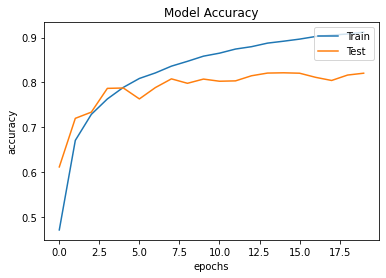

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.show()

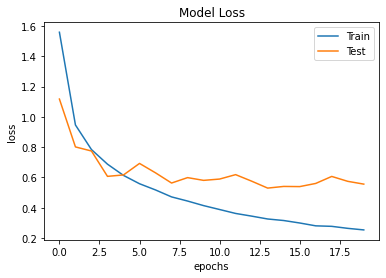

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.show()

In [43]:
scores = cifar_model.evaluate(X_test, y_test)
scores

10000/10000 [==============================] - 2s 185us/step


[0.594408614063263, 0.8122000098228455]

In [44]:
y_pred = cifar_model.predict(X_test)
wrong_pred = y_pred[y_pred!=y_test]
wrong_pred.shape, y_pred.shape

((99873,), (10000, 10))

In [92]:
from keras.models import load_model
model = load_model('cifar_model_best.h5')
model.evaluate(X_test, y_test)

ValueError: ignored

In [0]:
import cv2
test_img = cv2.imread('test_images/frog3.jpg')
test_img = np.array(test_img, dtype='float64')
test_img = normalize(test_img)
test_img = test_img.reshape(1,32,32,3)

In [0]:
result = cifar_model.predict(test_img)

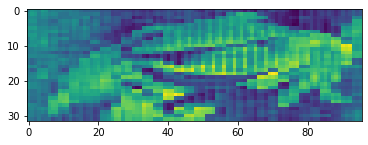

In [0]:
x = test_img
x = np.reshape(x, (32, 96))
plt.imshow(x)

In [0]:
result ,np.argmax(result), f[b'label_names'][4]

(array([[0.018746  , 0.01532594, 0.14270659, 0.02649594, 0.7134462 ,
         0.00496162, 0.01373439, 0.01058137, 0.01636636, 0.03763561]],
       dtype=float32), 4, b'deer')

In [0]:
import cv2
import glob
images = [cv2.imread(file) for file in glob.glob('test_images/*.jpg')]
images = np.array(images)

In [0]:
images[0].shape

(32, 32, 3)

In [0]:
#x = normalize(np.array(images[7], dtype='float64'))
for i in range(images.shape[0]):
  images[i] = np.array(images[i], dtype='float32')
  images[i] = images[i].reshape(1,32,32,3)

In [0]:
results = []
for i in range(images.shape[0]):
  x = cifar_model.predict(images[i].reshape(1,32,32,3))
  results.append(np.argmax(x))

In [49]:
x, results 

(array([[0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 6.825136e-15]], dtype=float32),
 [1, 1, 1, 1, 1, 3, 1, 7, 1, 1, 1, 1, 1])

In [68]:
images.shape[0]

13

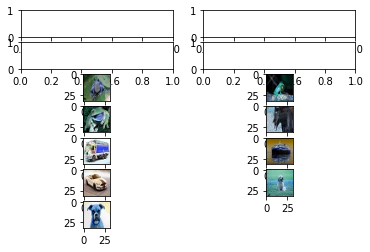

In [74]:
fig = plt.figure()

ax1 = fig.add_subplot(7,2,1)
#ax1.figure(figsize=(20,10))
ax2.imshow(images[0])
ax2 = fig.add_subplot(7,2,2)
ax3.imshow(images[1])
ax3 = fig.add_subplot(7,2,3)
ax4.imshow(images[2])
ax4 = fig.add_subplot(7,2,4)
ax5.imshow(images[3])
ax5 = fig.add_subplot(7,2,5)
ax5.imshow(images[4])
ax6 = fig.add_subplot(7,2,6)
ax6.imshow(images[5])
ax7 = fig.add_subplot(7,2,7)
ax7.imshow(images[6])
ax8 = fig.add_subplot(7,2,8)
ax8.imshow(images[7])
ax9 = fig.add_subplot(7,2,9)
ax9.imshow(images[8])
ax10 = fig.add_subplot(7,2,10)
ax10.imshow(images[9])
ax11 = fig.add_subplot(7,2,11)
ax11.imshow(images[10])
ax12 = fig.add_subplot(7,2,12)
ax12.imshow(images[11])
ax13 = fig.add_subplot(7,2,13)
ax13.imshow(images[12])
#ax14 = fig.add_subplot(7,2,14)
#ax14.imshow(images[13])

#ax15.imshow(images[14])

In [0]:
fig = fig.plt.figure(figsize = (10, 10))
columns = 3
rows = 5 
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(images.shape[0]):
  plt.title()
  plt.imshow(images[i])

SyntaxError: ignored